In [4]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [5]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

In [7]:
tickers = tickers.Symbol.to_list()

In [9]:
tickers = [i.replace('.','-') for i in tickers] # BRK.B -> BRK-B

In [10]:
tickers

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'BIO',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF-B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'COP',
 'ED'

In [16]:
def RSIcalc(asset):
    df = yf.download(asset,start='2011-01-01')
    df['MA200'] = df['Adj Close'].rolling(window=200).mean() # mean of the last 200 days
    
    # relative return
    df['price change'] = df['Adj Close'].pct_change() # get the daily return
    df['Upmove'] = df['price change'].apply(lambda x: x if x>0 else 0)
    df['Downmove'] = df['price change'].apply(lambda x: abs(x) if x < 0 else 0)
    
    # 移动平均线(MA:Moving Average): 将一定时期内的证券价格（指数）加以平均
    # 并把不同时间的平均值连接起来，形成一根MA，用以观察证券价格变动趋势的一种技术指标。
    # Exponential moving average
    df['avg Up'] = df['Upmove'].ewm(span=19).mean()  # ewm, exponential moving average
    df['avg Down'] = df['Downmove'].ewm(span=19).mean()
    
    df = df.dropna()
    
    df['RS'] = df['avg Up'] / df['avg Down']
    df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
    
    # make decision
    df.loc[(df['Adj Close'] > df['MA200']) & (df['RSI'] < 30), 'Buy'] = 'Yes'
    df.loc[(df['Adj Close'] < df['MA200']) | (df['RSI'] > 30), 'Buy'] = 'No'
    return df

In [28]:
def getSignals(df):
    Buying_dates = []
    Selling_dates = []
    
    for i in range(len(df)-11):
        if "Yes" in df['Buy'].iloc[i]:
            Buying_dates.append(df.iloc[i+1].name)
            for j in range(1,11):
                if df['RSI'].iloc[i+j] > 30:
                    Selling_dates.append(df.iloc[i+j+1].name)
                    break
                elif j == 10:
                    Selling_dates.append(df.iloc[i+j+1].name)
                    
    return Buying_dates, Selling_dates

In [19]:
# example
frame = RSIcalc(tickers[0])
buy, sell = getSignals(frame)

[*********************100%***********************]  1 of 1 completed


In [20]:
buy

[Timestamp('2012-03-07 00:00:00'),
 Timestamp('2012-04-11 00:00:00'),
 Timestamp('2012-05-15 00:00:00'),
 Timestamp('2012-05-16 00:00:00'),
 Timestamp('2012-05-18 00:00:00'),
 Timestamp('2012-05-21 00:00:00'),
 Timestamp('2012-06-05 00:00:00'),
 Timestamp('2012-06-06 00:00:00'),
 Timestamp('2012-10-24 00:00:00'),
 Timestamp('2012-10-25 00:00:00'),
 Timestamp('2013-08-22 00:00:00'),
 Timestamp('2014-01-27 00:00:00'),
 Timestamp('2014-01-28 00:00:00'),
 Timestamp('2014-01-29 00:00:00'),
 Timestamp('2014-01-31 00:00:00'),
 Timestamp('2014-02-03 00:00:00'),
 Timestamp('2014-02-04 00:00:00'),
 Timestamp('2014-08-01 00:00:00'),
 Timestamp('2014-08-04 00:00:00'),
 Timestamp('2014-08-06 00:00:00'),
 Timestamp('2014-08-07 00:00:00'),
 Timestamp('2014-08-08 00:00:00'),
 Timestamp('2014-10-02 00:00:00'),
 Timestamp('2014-10-03 00:00:00'),
 Timestamp('2015-04-30 00:00:00'),
 Timestamp('2015-05-01 00:00:00'),
 Timestamp('2016-10-12 00:00:00'),
 Timestamp('2016-10-13 00:00:00'),
 Timestamp('2016-10-

/Users/jeanneluo/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


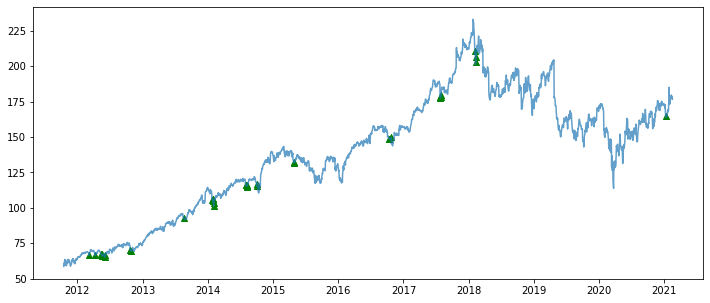

In [21]:
# visual the buy data
plt.figure(figsize=(12,5))
plt.scatter(frame.loc[buy].index, frame.loc[buy]['Adj Close'], marker = '^', c='g')
plt.plot(frame['Adj Close'], alpha=0.7)

In [22]:
sell

[Timestamp('2012-03-08 00:00:00'),
 Timestamp('2012-04-12 00:00:00'),
 Timestamp('2012-05-17 00:00:00'),
 Timestamp('2012-05-17 00:00:00'),
 Timestamp('2012-05-22 00:00:00'),
 Timestamp('2012-05-22 00:00:00'),
 Timestamp('2012-06-07 00:00:00'),
 Timestamp('2012-06-07 00:00:00'),
 Timestamp('2012-11-02 00:00:00'),
 Timestamp('2012-11-02 00:00:00'),
 Timestamp('2013-08-23 00:00:00'),
 Timestamp('2014-01-30 00:00:00'),
 Timestamp('2014-01-30 00:00:00'),
 Timestamp('2014-01-30 00:00:00'),
 Timestamp('2014-02-05 00:00:00'),
 Timestamp('2014-02-05 00:00:00'),
 Timestamp('2014-02-05 00:00:00'),
 Timestamp('2014-08-05 00:00:00'),
 Timestamp('2014-08-05 00:00:00'),
 Timestamp('2014-08-11 00:00:00'),
 Timestamp('2014-08-11 00:00:00'),
 Timestamp('2014-08-11 00:00:00'),
 Timestamp('2014-10-06 00:00:00'),
 Timestamp('2014-10-06 00:00:00'),
 Timestamp('2015-05-04 00:00:00'),
 Timestamp('2015-05-04 00:00:00'),
 Timestamp('2016-10-14 00:00:00'),
 Timestamp('2016-10-14 00:00:00'),
 Timestamp('2016-10-

In [23]:
Profits = (frame.loc[sell].Open.values - frame.loc[buy].Open.values)/frame.loc[buy].Open.values

In [24]:
Profits

array([ 0.00961989,  0.00410026, -0.00453751, -0.0040741 , -0.00106153,
        0.00965671,  0.03632401,  0.02847867,  0.00651468,  0.01174214,
        0.01012236, -0.00046145,  0.00409499, -0.00107609,  0.01113741,
       -0.00163786,  0.0152272 ,  0.00335356,  0.00335356,  0.01286469,
        0.0062834 ,  0.01170129,  0.01428878,  0.0087562 ,  0.01007516,
        0.01026852,  0.00819575,  0.0125541 , -0.01841872,  0.00917933,
        0.01581799,  0.00747049,  0.01144997,  0.02496597,  0.02270605,
        0.00975868,  0.00825805])

In [25]:
wins = [i for i in Profits if i > 0]

In [26]:
len(wins)/len(Profits)

0.8108108108108109

In [27]:
len(Profits) # 10 years only 37 trades

37

In [29]:
matrixsignals = []
matrixprofits = []

for i in range(len(tickers)):
    frame = RSIcalc(tickers[i])
    buy, sell = getSignals(frame)
    Profits = (frame.loc[sell].Open.values - frame.loc[buy].Open.values)/frame.loc[buy].Open.values
    matrixsignals.append(buy)
    matrixprofits.append(Profits)
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ValueError: cannot set a frame with no defined index and a scalar

In [30]:
len(matrixprofits)

allprofit = []
for i in matrixprofits:
    for e in i:
        allprofit.append(e)
        
wins = [i for i in allprofit if i > 0]
len(wins)/len(allprofit)  # calc win rate

0.687763406481616

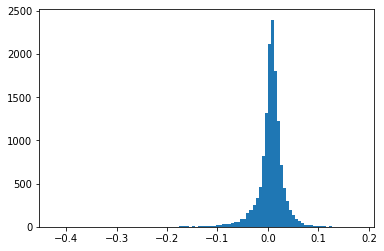

In [31]:
plt.hist(allprofit,bins=100)
plt.show()

In [32]:
for i in matrixsignals:
    for e in i:
        if e.year == 2021:
            print(e)

2021-01-12 00:00:00
2021-01-28 00:00:00
2021-02-01 00:00:00
2021-01-27 00:00:00
2021-01-28 00:00:00
2021-01-28 00:00:00
2021-01-28 00:00:00
2021-01-28 00:00:00
2021-01-28 00:00:00
2021-01-15 00:00:00
2021-01-19 00:00:00
2021-01-20 00:00:00
2021-01-22 00:00:00
2021-02-01 00:00:00
2021-01-28 00:00:00
2021-01-28 00:00:00
2021-01-28 00:00:00
2021-01-05 00:00:00
2021-01-28 00:00:00
2021-01-27 00:00:00
2021-01-28 00:00:00
2021-01-28 00:00:00
2021-02-01 00:00:00
2021-01-15 00:00:00
2021-01-19 00:00:00
2021-01-21 00:00:00
2021-01-22 00:00:00
2021-01-25 00:00:00
2021-01-26 00:00:00
2021-01-27 00:00:00
2021-01-28 00:00:00
2021-01-28 00:00:00
2021-02-01 00:00:00
2021-01-28 00:00:00
2021-01-20 00:00:00
2021-01-07 00:00:00
2021-01-08 00:00:00
2021-01-15 00:00:00
2021-01-19 00:00:00
2021-01-20 00:00:00
2021-01-21 00:00:00
2021-01-25 00:00:00
2021-01-28 00:00:00
2021-01-08 00:00:00
2021-01-20 00:00:00
2021-01-21 00:00:00
2021-01-22 00:00:00
2021-01-25 00:00:00
2021-01-26 00:00:00
2021-01-27 00:00:00


In [17]:
# RSIcalc(tickers[0])

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,MA200,price change,Upmove,Downmove,avg Up,avg Down,RS,RSI,Buy
Date,,,,,,,,,,,,,,,
2011-10-17,78.629997,79.050003,75.660004,75.879997,58.532463,4359500,67.563194,-0.038155,0.000000,0.038155,0.010029,0.010096,0.993419,49.834936,No
2011-10-18,76.180000,79.150002,75.709999,78.360001,60.445522,4167200,67.536846,0.032684,0.032684,0.000000,0.012295,0.009086,1.353122,57.503261,No
2011-10-19,78.260002,78.860001,77.269997,77.699997,59.936394,3865000,67.508407,-0.008423,0.000000,0.008423,0.011065,0.009020,1.226766,55.091826,No
2011-10-20,77.769997,79.059998,77.110001,78.680000,60.692356,4087300,67.483748,0.012613,0.012613,0.000000,0.011220,0.008118,1.382134,58.020834,No
2011-10-21,79.379997,80.559998,78.980003,80.480003,62.080837,5125200,67.468038,0.022877,0.022877,0.000000,0.012386,0.007306,1.695257,62.897790,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-09,181.220001,181.899994,180.179993,180.940002,179.461151,1942800,160.555420,0.000996,0.000996,0.000000,0.007658,0.004292,1.784140,64.082265,No
2021-02-10,181.880005,182.380005,180.639999,181.080002,179.600006,1929000,160.712151,0.000774,0.000774,0.000000,0.006969,0.003863,1.804169,64.338815,No
2021-02-11,179.350006,179.880005,175.839996,177.210007,177.210007,2187100,160.837826,-0.013307,0.000000,0.013307,0.006273,0.004807,1.304760,56.611542,No
